## plot_timeheight.ipynb

Author: Robert M. Frost

University of Oklahoma

Created: 09 November 2023

Purpose: Plot timeheight series of supercell updrafts

In [51]:
import matplotlib.pyplot as plt
from matplotlib import rc
import xarray as xr
import pyart
import numpy as np
from matplotlib.ticker import MultipleLocator

In [52]:
# Set the font weight for plot titles
plt.rcParams['axes.titleweight'] = 'bold'

# Set the font weight for x-axis and y-axis labels
plt.rcParams['axes.labelweight'] = 'normal'

plt.rcParams['text.latex.preamble'] = r'\usepackage{bm}'

# Other plotting setup
rc('font', family='sans-serif')
rc('font', weight='normal', size=15)
rc('figure', facecolor='white') 

In [53]:
dth = "/Users/robertfrost/Documents/boomsoon/2023_semester_2/capstone/analysis/Capstone_2023/data/timeheight_201708-053.nc"
th = xr.open_dataset(dth)

In [54]:
time = th.time
z = th.z
reflectivity = th.reflectivity

In [55]:
reflectivity_threshhold = 40 # in dbz
high_reflectivity = reflectivity.where(reflectivity > reflectivity_threshhold)
updraft_depth_idx = high_reflectivity.argmin(dim="z")
updraft_depth = th.z[updraft_depth_idx]

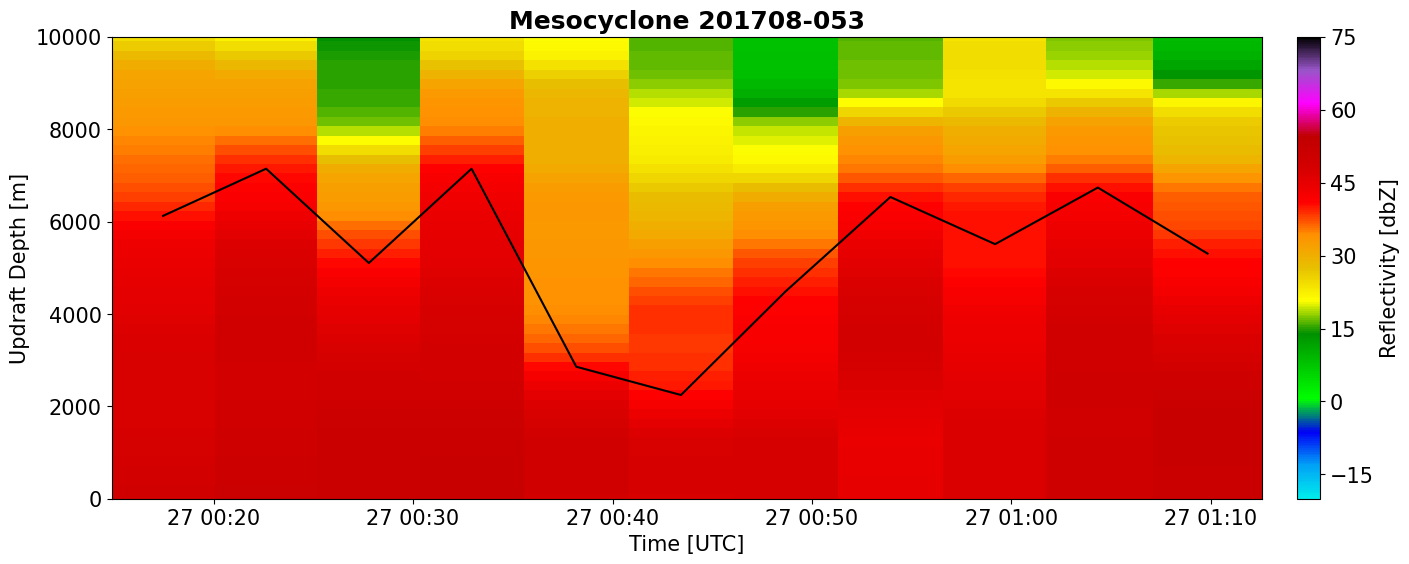

In [63]:
fig, ax = plt.subplots(figsize=(18,6))

pc = ax.pcolormesh(time, z, reflectivity.T, cmap="pyart_NWSRef", vmin=-20, vmax=75)
ax.plot(time, updraft_depth, c="black", lw=1.5)

ax.set_ylabel("Updraft Depth [m]")
ax.set_xlabel("Time [UTC]")
ax.set_ylim(0,10000)

ax.set_title(f"Mesocyclone {th.mesocyclone_id}")

cb = plt.colorbar(pc, pad=.025)
cb.set_ticks(MultipleLocator(15))
cb.set_label("Reflectivity [dbZ]")